In [137]:
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from adjustText import adjust_text
from matplotlib.patches import FancyArrowPatch

In [3]:
adata_fn = sorted(glob.glob('../data/processed/*/*.h5ad'))
adata_dict = {fn.split('/')[-1].split('_')[0] : fn for fn in adata_fn}
for key in adata_dict:
    adata_dict[key] = sc.read_h5ad(adata_dict[key])
    print(key, adata_dict[key])

GSE136689 AnnData object with n_obs × n_vars = 10097 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
GSE162534 AnnData object with n_obs × n_vars = 8725 × 19013
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
GSE201257 Ann

In [4]:
adata_bulk_dict = adata_dict.copy()
for key in adata_dict:
    adata_key = adata_dict[key][~adata_dict[key].obs.celltype.isna()]
    adata_bulk_dict[key] = sc.get.aggregate(adata_key, 'celltype', 'mean')
    print(key, adata_bulk_dict[key])

GSE136689 AnnData object with n_obs × n_vars = 8 × 17462
    obs: 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'
GSE162534 AnnData object with n_obs × n_vars = 3 × 19013
    obs: 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'
GSE201257 AnnData object with n_obs × n_vars = 12 × 21676
    obs: 'celltype'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'
GSE229103 AnnData object with n_obs × n_vars = 7 × 20088
    obs: 'celltype'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'


In [5]:
signature_fn = sorted(glob.glob('../03_signatures/results/*/*.txt'))
signature_dict = {'_'.join(fn.split('/')[-2:]).replace('.txt', '') : fn for fn in signature_fn}
for key in signature_dict:
    signature_dict[key] = np.loadtxt(signature_dict[key], dtype = str)
    print(key, signature_dict[key])

GSE136689_early ['Egfl7' 'Fam162a' 'Mpped2' 'Cdkn1c' 'Npm3' 'Tbx1' 'Tpm2' 'Ier2' 'Ube2c'
 'Aldoa' 'Gpx3' 'Car2' 'Cited2' 'Ebf1' 'Rbm24' 'Fgf8' 'Irx1' 'Nnat'
 'Galk1' 'Dab2' 'Slc16a3' 'Clu' 'Tpm1' 'Actb' 'Ccnd2' 'Igfbpl1' 'Higd1a'
 'Nop58' 'Isl1' 'Pdcd4' 'Cnn2' 'Map1b' 'Myl4' 'Ifitm1' 'Ddit4' 'Id1'
 'Gm266' 'Id3' 'Myl7' 'Tpi1' 'Asb4' 'Cks2' 'Tspan7' 'Vamp5' 'Prrx2' 'Gpi1'
 'Tnnt2' 'Meg3' 'Nrg1' 'Pfkl' 'Mmd' 'Sox11' 'Slc2a1' 'Hn1' 'Mpzl1' 'Tnni1'
 'Igfbp2' 'Apoe' 'Rdx' 'Wls' 'Irx3' 'Bnip3' 'Vamp8' 'Frzb' 'Xist' 'Rcsd1'
 'Irx5' 'Crabp1' 'Plk1' 'Polr2h' 'Fst' 'Traf4' 'Nkx2-5' 'Mef2c']
GSE136689_late ['Hoxb1' 'Osr1' 'Foxf1' 'Mdk' 'Rbp1' 'Rgs5' 'Mycn' 'Manf' 'Abhd11os'
 'Aldh1a2' 'H19' 'Krt18' 'Homer2' 'Csrp2' 'Pmp22' 'Peg3' 'Hoxa1' 'Popdc2'
 'Phlda1' 'Sfrp5' 'Gata6' 'Bex2' 'Cox17' 'Gyg' 'Nrp1' 'Hotairm1' 'Rras2'
 'Dusp9' 'Ly6e' 'Ngfrap1' 'Gata5' 'Fam188a' 'Wbp5' 'Bex1' 'Sfrp1' 'Wnt2'
 'Alx1' 'Smarcd3' 'Ddt' 'Nr2f2' 'Hand2' 'Car4' 'Krt8' 'Arg1' 'Meis1' 'Id2'
 'Phlda2']
GSE162534_early ['Igfb

In [6]:
df_ix = np.concatenate([adata_bulk_dict[key].obs.celltype for key in adata_bulk_dict])
df_col = np.asarray(signature_dict.keys())
df = pd.DataFrame(0., index = df_ix, columns = df_col)
for adata in adata_bulk_dict.values():
    for col in df.columns:
        df.loc[adata.obs.celltype, col] = sc.tl.score_genes(
            adata, signature_dict[col], ctrl_as_ref = True,
            score_name = col, copy = True, layer = 'mean').obs[col]
df_norm = df.apply(zscore)

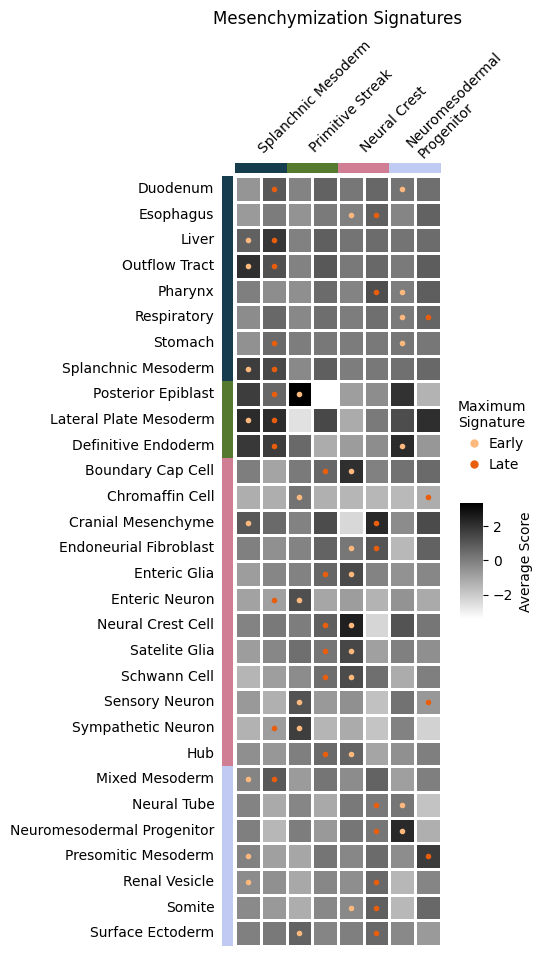

In [160]:
# signatures heatmap
col_cat = np.flip(np.vstack(df.columns.str.split('_')), 1)
col_cat = pd.DataFrame(col_cat, index = df.columns, columns = ['stage', 'GEO'])
row_cat = np.concatenate([[key] * adata_bulk_dict[key].shape[0] for key in adata_bulk_dict])
row_cat = pd.Series(row_cat, index = df.index, name = 'GEO')
stages = col_cat.stage.unique()
dsets = col_cat.GEO.unique()
stage_cdict = dict(zip(stages, sns.color_palette('Oranges', stages.size)))
dset_cdict = dict(zip(dsets, sns.color_palette('cubehelix', dsets.size)))
row_colors = row_cat.map(dset_cdict).values
col_colors = col_cat.GEO.map(dset_cdict).values

lw, cw, cbar_dict = 1, .4, {'label' : 'Average Score', 'shrink' : .15, 'aspect' : 5}
fig, ax = plt.subplots(1, 1, figsize = (5, 10))
sns.heatmap(df_norm, cmap = 'binary', square = True, cbar_kws = cbar_dict, linewidths = lw, linecolor = 'w', ax = ax)

for kind in ('row', 'column'):
    if kind == 'row':
        w, h, cc = cw, 1, row_colors
        xx = np.full(df.shape[0], -cw - .1)
        yy = np.arange(df.shape[0])
    else:
        w, h, cc = 1, cw, col_colors
        xx = np.arange(df.shape[1])
        yy = np.full(df.shape[1], -cw - .1)
    for x, y, c in zip(xx, yy, cc):
        ax.add_patch(Rectangle(
            (x, y), w, h, 
            facecolor = c, 
            edgecolor = 'none',
            transform = ax.transData,
            clip_on = False))

stage_legend = [None] * stages.size
for i, stage in enumerate(stages):
    msk_stage = (col_cat.stage == stage)
    c = stage_cdict[stage]
    for y, ix in enumerate(df.index):
        max_signature = df_norm.loc[ix, msk_stage].idxmax()
        x = np.where(df.columns == max_signature)[0][0] + .5
        ax.scatter(x, (y + .5), marker = '.', color = c)
    stage_legend[i] = Line2D(
        [0], [0], marker = '.',  
        markersize = 10, 
        label = stage.capitalize(), 
        color = 'none', 
        markerfacecolor = c, 
        markeredgecolor = c)
    
ax.legend(handles = stage_legend,
          title = 'Maximum\nSignature',
          loc = 'lower center',
          bbox_to_anchor = (1.25, .6),
          frameon = False,
          handletextpad = 0)

dset_labels = {
    'GSE201257' : 'Neural Crest',
    'GSE229103' : 'Neuromesodermal\nProgenitor',
    'GSE136689' : 'Splanchnic Mesoderm',
    'GSE162534' : 'Primitive Streak'}

xticks = np.arange(0, df.shape[1], 2) + 1
xticklabels = [dset_labels[dset] for dset in dsets]
ax.set_xticks(xticks, xticklabels, rotation = 45, rotation_mode = 'anchor', ha = 'left', va = 'center')
ax.tick_params('x', bottom = False, labelbottom = False, labeltop = True, pad = 15)
ax.set_ylabel('')
ax.tick_params('y', size = 0, pad = 15)
ax.set_title('Mesenchymization Signatures', pad = 10)
plt.show()

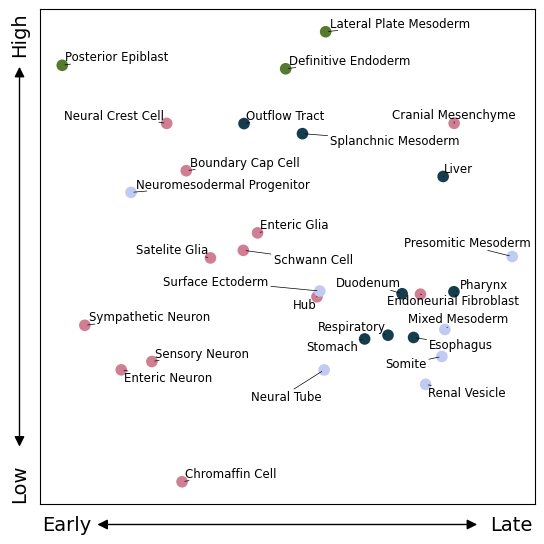

In [207]:
# mesenchymization spectrum
df_mes = df_norm.T.copy()
df_mes['stage'] = col_cat.stage
df_mes = df_mes.groupby('stage').max().T
df_mes['avg'] = df_mes.mean(1)
df_mes['diff'] = np.diff(df_mes[stages])
df_mes['c'] = row_colors

ms, fs, fw = 70, 8.5, 5.25
fig, ax = plt.subplots(1, 1, figsize = (fw, fw))
df_mes.plot.scatter('diff', 'avg', ms, 'c', lw = 0, ax = ax)

labels = [None] * df_mes.shape[0]
for i, ix in enumerate(df_mes.index):
    labels[i] = plt.text(*df_mes.loc[ix, ['diff', 'avg']], ix, fontsize = fs, ha = 'center', va = 'center')
adjust_text(labels, arrowprops = {'arrowstyle' : '-', 'color' : 'k', 'lw' : .5})

label_offset, arrow_offset, text_offset = -.01, .133, .033
for axis in ('x', 'y'):
    if axis == 'x':
        start, end = (arrow_offset, label_offset), (1 - arrow_offset, label_offset)
        text1 = (text_offset, label_offset, 'Early', 'left', 'center', 0)
        text2 = (1 - text_offset, label_offset, 'Late', 'right', 'center', 0)
    else:
        start, end = (label_offset, arrow_offset), (label_offset, 1 - arrow_offset)
        text1 = (label_offset, text_offset, 'Low', 'center', 'bottom', 90)
        text2 = (label_offset, 1 - text_offset, 'High', 'center', 'top', 90)
    arrow = FancyArrowPatch(start, end, arrowstyle = '<|-|>', color = 'k', mutation_scale = 15, transform = fig.transFigure)
    fig.patches.append(arrow)
    for x, y, s, ha, va, rot in (text1, text2):
        fig.text(x, y, s, ha = ha, va = va, rotation = rot, fontsize = 14)

ax.set_xticks([])
ax.set_xlabel('')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_box_aspect(1)

plt.tight_layout()
plt.show()